<a href="https://colab.research.google.com/github/Aravind06-12/Job_Board_Scraper/blob/main/AI_Resume_Categorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn gradio

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet.csv


In [ ]:
import pandas as pd
df = pd.read_csv("UpdatedResumeDataSet.csv")
df = df[['Resume', 'Category']].dropna()
df.head()


,Resume,Category
0,Skills * Programming Languages: Python (pandas...,Data Science
1,Education Details \r\nMay 2013 to May 2017 B.E...,Data Science
2,"Areas of Interest Deep Learning, Control Syste...",Data Science
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Data Science
4,"Education Details \r\n MCA YMCAUST, Faridab...",Data Science


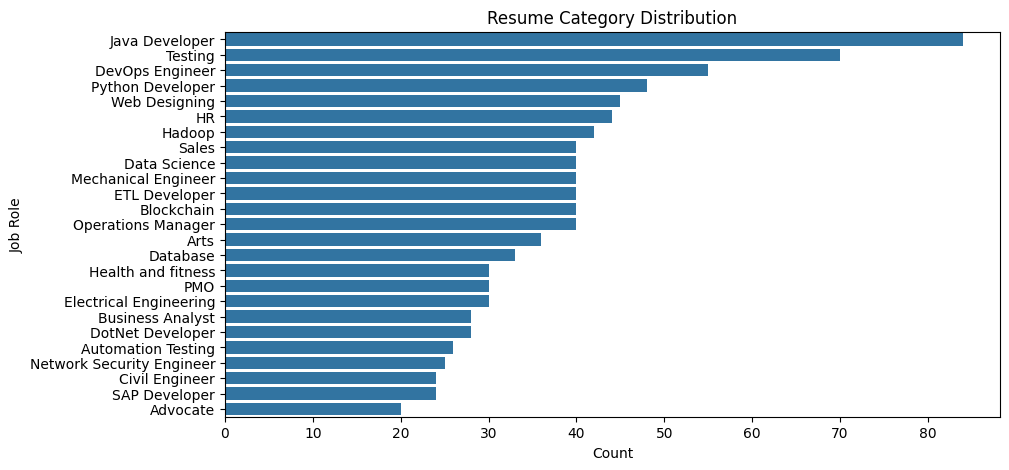

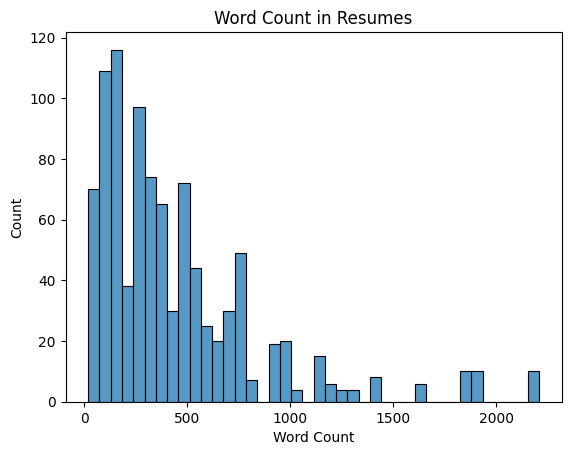

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

# Word count
df['word_count'] = df['Resume'].apply(lambda x: len(str(x).split()))
sns.histplot(df['word_count'], bins=40)
plt.title("Word Count in Resumes")
plt.xlabel("Word Count")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Resume']
y = df['Category']

# Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results)
results_df



Logistic Regression Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.994819,0.995466,0.994819,0.994895
1,SVM,0.994819,0.995855,0.994819,0.995011
2,Random Forest,0.994819,0.995123,0.994819,0.994801


In [ ]:
import pickle

# Save best model & vectorizer (e.g., Logistic Regression)
best_model = trained_models["Logistic Regression"]
pickle.dump(best_model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


In [ ]:
import gradio as gr
import pickle

# Load model and vectorizer
model = pickle.load(open("model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

def predict_resume_category(text):
    if not text.strip():
        return "❌ Please paste a valid resume text."
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return f"✅ Predicted Job Role: {pred}"

interface = gr.Interface(
    fn=predict_resume_category,
    outputs="text",
    title="📄 AI Resume Categorizer",
    inputs=gr.Textbox(lines=20, placeholder="Paste resume text here...", label="Resume Text"),
    description="Upload your resume to see the predicted job category using AI",
    examples=[
        ["Experienced in Python, ML, SQL, Tableau, and built fraud detection systems."],
        ["Skilled in HTML, CSS, React, and building UI for e-commerce websites."]
    ]
)

interface.launch()



FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'